In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
import sklearn

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


# Load Data

In [5]:
sstdat = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
sst = sstdat['sst']
print(sst)
#note: lat & lon go by scale of 2 degrees


slpdat = xr.open_dataset('data/slp.mnmean.real.nc')
slp = slpdat['slp']
print(slp)
# https://www.metoffice.gov.uk/hadobs/hadslp2/data/hadslp2r.asc.gz
#note: lat & lon go by scale of 5 degrees


<xarray.DataArray 'sst' (time: 1997, lat: 89, lon: 180)>
[31991940 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-05-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]
<xarray.DataArray 'slp' (time: 2040, lat: 37, lon: 72)>
[5434560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 85.0 80.0 75.0 70.0 ... -75.0 -80.0 -85.0 -90.0
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * time     

In [6]:
dat = xr.open_dataset('/global/scratch/medhap02/ERA5_MSLP_SST_Td_tas_Jan1979toMay2020.grib',engine='pynio')

ERA5sst = dat['SSTK_GDS0_SFC_S123']
ERA5sst = ERA5sst.rename({'g0_lon_2':'lon', 'g0_lat_1':'lat', 'initial_time0_hours':'time'})

ERA5slp = dat['MSL_GDS0_SFC_S123']
ERA5slp = ERA5slp.rename({'g0_lon_2':'lon', 'g0_lat_1':'lat', 'initial_time0_hours':'time'})

print(ERA5sst)
print(ERA5slp)

<xarray.DataArray 'SSTK_GDS0_SFC_S123' (time: 497, lat: 721, lon: 1440)>
[516005280 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-05-01
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
Attributes:
    center:                          European Center for Medium-Range Weather...
    long_name:                       Sea surface temperature
    units:                           K
    level_indicator:                 [1]
    gds_grid_type:                   [0]
    parameter_table_version:         [128]
    parameter_number:                [34]
    forecast_time:                   [0]
    forecast_time_units:             hours
    statistical_process_descriptor:  average of N uninitialized analyses
    statistical_process_duration:    instantaneous (beginning at reference ti...
    N:                               [744 672 74

In [7]:
precipdat = xr.open_dataset('pALLIN.nc', decode_times=False)
print(precipdat)
time = pd.date_range('1874-05-01', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 1748.0 1749.0 1750.0 1751.0
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0


<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

In [8]:
ERA5sst = ERA5sst.interp_like(sst)
print(ERA5sst)

<xarray.DataArray 'SSTK_GDS0_SFC_S123' (time: 1997, lat: 89, lon: 180)>
array([[[       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ...,
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ...,
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       ...,

       [[271.459961, 271.459961, ..., 271.459961, 271.459961],
        [271.459961, 271.459961, ..., 271.459961, 271.459961],
        ...,
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[271.459717, 271.459717, ..., 271.459717, 271.459717],
        [271.459717, 271.459717, ..., 271.459717, 2

In [9]:
ERA5slp = ERA5slp.interp_like(slp)
print(ERA5slp)

<xarray.DataArray 'MSL_GDS0_SFC_S123' (time: 2040, lat: 37, lon: 72)>
array([[[       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ...,
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ...,
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       ...,

       [[101759.875, 101759.875, ..., 101759.875, 101759.875],
        [101744.5  , 101748.5  , ..., 101731.25 , 101740.375],
        ...,
        [101105.625, 101210.625, ..., 100907.75 , 100995.75 ],
        [101412.875, 101412.875, ..., 101412.875, 101412.875]],

       [[101783.25 , 101783.25 , ..., 101783.25 , 101783.25 ],
        [101392.375, 101405.875, ..., 101372.375, 101

# EPT

In [10]:
#EP-ENSOpredictor
#NOAA

#DSST1
latrange1 = sst.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

maydata1 = sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

maydata2 = sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPT = DSST1 - DSST2
print("not normalized", EPT)
EPTstd = 0.546494
EPTmean = -0.036233
EPT = (EPT - EPTmean)/EPTstd
print("NOAA EPT", EPT)


not normalized <xarray.DataArray (time: 41)>
array([-0.690676, -0.30854 ,  0.178802, -0.488886, -0.276272,  0.351959,
        0.291702,  0.251247, -0.110556,  0.37538 ,  0.062571, -0.26915 ,
       -0.236698, -0.590948, -0.649965, -0.296124,  0.513609,  0.290936,
       -1.244699,  0.377625,  0.334726, -0.378567,  0.088423,  0.359867,
        0.955997,  0.315199, -0.615377,  0.197756,  0.554579, -0.432449,
       -0.868441,  0.333145, -0.403114, -0.200785,  0.599527, -0.358665,
       -1.162851,  0.492949,  0.313284, -0.301331, -0.021276], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
NOAA EPT <xarray.DataArray (time: 41)>
array([-1.19753 , -0.498281,  0.393482, -0.828285, -0.439234,  0.710332,
        0.600071,  0.526045, -0.135999,  0.753188,  0.180795, -0.426202,
       -0.36682 , -1.015043, -1.123036, -0.47556 ,  1.006126,  0.598668,
       -2.211308,  0.757296,  0.678799, -0.626418,  0.228101,  0.724802,
        1.815629,  0.64

In [11]:
#EP-ENSOpredictor
#ERA5

#DSST1
latrange1 = ERA5sst.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = ERA5sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (ERA5sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

maydata1 = ERA5sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (ERA5sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = ERA5sst.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = ERA5sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (ERA5sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15

maydata2 = ERA5sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (ERA5sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

ERA5EPT = DSST1 - DSST2
print("not normalized", ERA5EPT)
EPTstd = 0.546494
EPTmean = -0.036233
ERA5EPT = (ERA5EPT - EPTmean)/EPTstd
print("ERA5 EPT", ERA5EPT)


not normalized <xarray.DataArray (time: 41)>
array([-0.665502, -0.304013, -0.164997, -0.208539, -0.351791,  0.309322,
        0.548926,  0.155772, -0.524657,  0.631821, -0.106738, -0.503769,
       -0.485476, -0.532853, -0.430896, -0.21525 ,  0.300418,  0.339204,
       -0.954189,  0.325035,  0.488791,  0.063771,  0.285263,  0.163896,
        0.903784,  0.461364, -0.706126,  0.363891,  0.489793, -0.323812,
       -0.73977 ,  0.31578 , -0.331601,  0.023534,  0.972003, -0.19549 ,
       -1.094784,  0.433248,  0.119403, -0.616168, -0.261399])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 EPT <xarray.DataArray (time: 41)>
array([-1.151466, -0.489996, -0.235619, -0.315293, -0.577423,  0.632313,
        1.070752,  0.35134 , -0.893741,  1.222436, -0.129013, -0.855519,
       -0.822045, -0.908738, -0.722172, -0.327573,  0.61602 ,  0.686993,
       -1.679718,  0.661064,  0.960714,  0.182992,  0.588288,  0.366206,
        1.720087,  0.910525, -1.225802

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


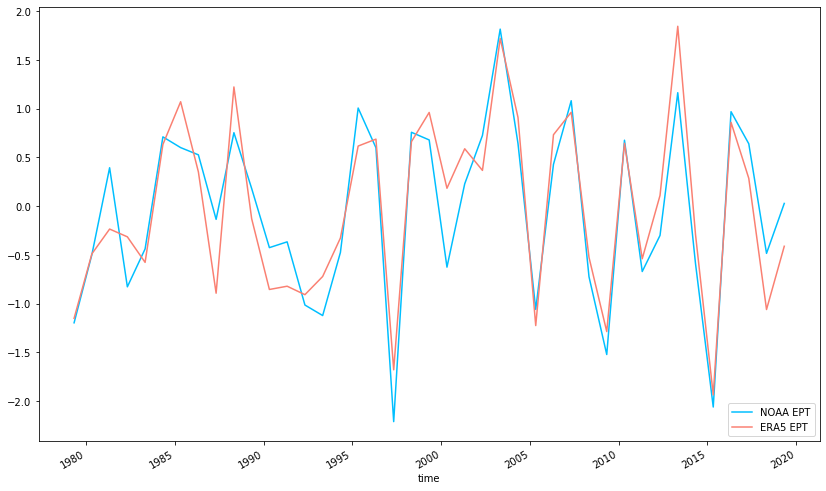

In [12]:
plt.figure(figsize=(14,8))
plt.title('Comparing EPT', fontsize = 'xx-large')
EPT.plot(label='NOAA EPT', color = 'deepskyblue')
ERA5EPT.plot(label='ERA5 EPT', color = 'salmon')
plt.legend(loc='lower right')

# CPT

In [13]:
#CP-ENSOpredictor
#NOAA

#DSST1
latrange1 = sst.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

maydata1 = sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = sst.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 
                          
maydata2 = sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() 
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

CPT = DSST1 - DSST2
print("not normalized", CPT)
CPTstd = 0.243743
CPTmean = -1.087295
CPT = (CPT - CPTmean)/CPTstd
print("NOAA CPT", CPT)

not normalized <xarray.DataArray (time: 41)>
array([-0.877079, -1.555321, -1.133108, -1.112932, -1.007406, -1.351151,
       -1.230379, -1.243137, -1.480965, -1.106583, -0.945692, -0.58638 ,
       -1.271177, -1.207592, -1.113825, -1.194332, -0.976677, -1.409504,
       -1.250013, -0.615412, -1.438681, -1.347534, -1.209969, -1.230007,
       -0.844175, -0.977886, -1.073309, -0.789785, -0.992636, -1.090977,
       -1.246532, -0.948189, -0.808014, -0.980453, -1.071667, -1.003197,
       -1.024609, -0.905445, -1.119499, -0.715998, -1.286224], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
NOAA CPT <xarray.DataArray (time: 41)>
array([ 0.86245 , -1.920161, -0.187957, -0.105181,  0.327758, -1.082515,
       -0.587028, -0.639371, -1.615101, -0.079131,  0.580952,  2.055095,
       -0.75441 , -0.49354 , -0.108843, -0.439139,  0.453831, -1.321921,
       -0.667581,  1.935987, -1.441623, -1.067678, -0.50329 , -0.585502,
        0.997443,  0.44

In [14]:
#CP-ENSOpredictor
#NOAA

#DSST1
latrange1 = ERA5sst.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = ERA5sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (ERA5sst['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

maydata1 = ERA5sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (ERA5sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = ERA5sst.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = ERA5sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (ERA5sst['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15
                          
maydata2 = ERA5sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (ERA5sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

ERA5CPT = DSST1 - DSST2
print("not normalized", ERA5CPT)
CPTstd = 0.243743
CPTmean = -1.087295
ERA5CPT = (ERA5CPT - CPTmean)/CPTstd
print("ERA5 CPT", ERA5CPT)

not normalized <xarray.DataArray (time: 41)>
array([-0.89817 , -1.049017, -1.27268 , -0.769294, -1.387553, -1.184479,
       -1.03488 , -1.312569, -1.563294, -0.937784, -0.59626 , -0.650755,
       -1.010113, -1.328883, -1.295438, -1.359223, -1.087925, -1.304091,
       -0.959478, -0.892542, -1.337457, -1.159097, -0.788728, -1.367646,
       -0.928325, -1.077247, -1.316927, -0.868579, -0.758212, -0.837485,
       -1.395404, -0.814515, -0.709365, -1.041236, -1.207369, -1.226425,
       -0.959963, -1.11735 , -1.076507, -0.637307, -1.479146])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 CPT <xarray.DataArray (time: 41)>
array([ 0.77592 ,  0.157042, -0.760574,  1.304658, -1.231865, -0.398716,
        0.215043, -0.924228, -1.952873,  0.613395,  2.01456 ,  1.790987,
        0.316652, -0.991159, -0.853945, -1.115634, -0.002584, -0.889443,
        0.524394,  0.799009, -1.026337, -0.294581,  1.224924, -1.150189,
        0.652203,  0.041223, -0.942109

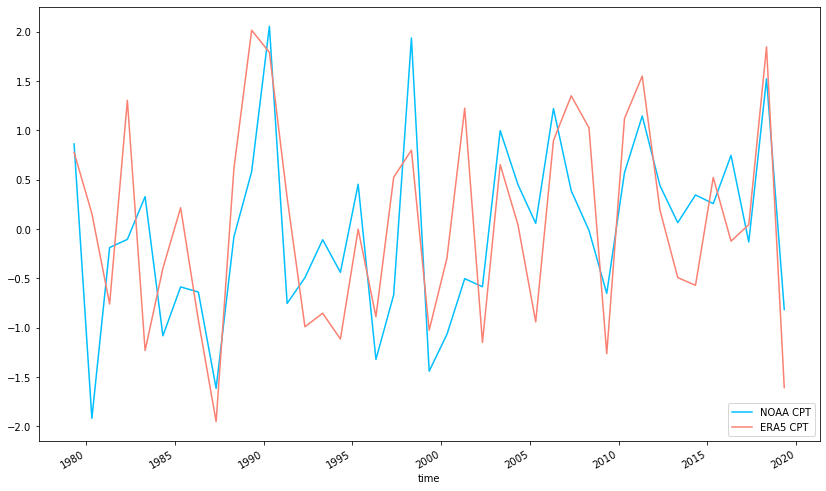

In [15]:
plt.figure(figsize=(14,8))
plt.title('Comparing CPT', fontsize = 'xx-large')
CPT.plot(label='NOAA CPT', color = 'deepskyblue')
ERA5CPT.plot(label='ERA5 CPT', color = 'salmon')
plt.legend(loc='lower right')

# PSH

In [16]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1979-04-01','2019-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSH = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
print("not normalized", PSH)
PSHstd = 0.430541
PSHmean = 1015.898018
PSH = (PSH - PSHmean)/PSHstd
print("Hadley PSH", PSH)

not normalized <xarray.DataArray (time: 41)>
array([1015.369285, 1015.578792, 1015.4776  , 1015.444772, 1016.135217,
       1016.460457, 1016.036373, 1015.55654 , 1016.034757, 1016.45449 ,
       1016.299596, 1016.166051, 1015.505997, 1015.34733 , 1015.557042,
       1015.763202, 1015.679916, 1016.426659, 1014.740642, 1016.284865,
       1016.552542, 1016.419521, 1016.650116, 1015.597514, 1016.209822,
       1016.122535, 1016.222696, 1015.874155, 1017.637944, 1015.971944,
       1015.768805, 1017.879593, 1017.731951, 1016.752673, 1016.83261 ,
       1017.146023, 1015.775102, 1015.765541, 1016.97512 , 1016.77159 ,
       1016.879105])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
Hadley PSH <xarray.DataArray (time: 41)>
array([-1.228066, -0.741454, -0.976487, -1.052737,  0.550933,  1.306355,
        0.321351, -0.793137,  0.317597,  1.292494,  0.932728,  0.62255 ,
       -0.91053 , -1.279061, -0.79197 , -0.313133, -0.506576,  1.227854,
       -2.688

In [17]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = ERA5slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = ERA5slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (ERA5slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1979-04-01','2019-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())/100

maydata1 = ERA5slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (ERA5slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1979-05-01', '2019-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())/100

aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = ERA5slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = ERA5slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (ERA5slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1979-04-01', '2019-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())/100

maydata2 = ERA5slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (ERA5slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1979-05-01', '2019-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())/100

aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
ERA5PSH = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
print("not normalized", ERA5PSH)
PSHstd = 0.430541
PSHmean = 1015.898018
ERA5PSH = (ERA5PSH - PSHmean)/PSHstd
print("ERA5 PSH", ERA5PSH)

not normalized <xarray.DataArray (time: 41)>
array([1014.50813 , 1015.153393, 1015.222228, 1014.978146, 1016.210161,
       1016.585616, 1015.679029, 1014.903876, 1015.905046, 1016.410092,
       1015.90475 , 1015.950498, 1015.051931, 1014.843834, 1015.420599,
       1015.523399, 1015.673207, 1016.566325, 1014.289687, 1016.71417 ,
       1016.648987, 1016.915892, 1016.645631, 1015.269397, 1016.258395,
       1016.24998 , 1015.872309, 1015.500376, 1017.225113, 1015.559378,
       1015.269787, 1017.402547, 1017.219708, 1016.294571, 1016.266665,
       1016.624871, 1015.422221, 1015.44516 , 1016.626536, 1016.289554,
       1016.490154])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 PSH <xarray.DataArray (time: 41)>
array([-3.228237, -1.72951 , -1.56963 , -2.136549,  0.725003,  1.597056,
       -0.508637, -2.309054,  0.016324,  1.189372,  0.015637,  0.121892,
       -1.965171, -2.448511, -1.108882, -0.870113, -0.522159,  1.55225 ,
       -3.73560

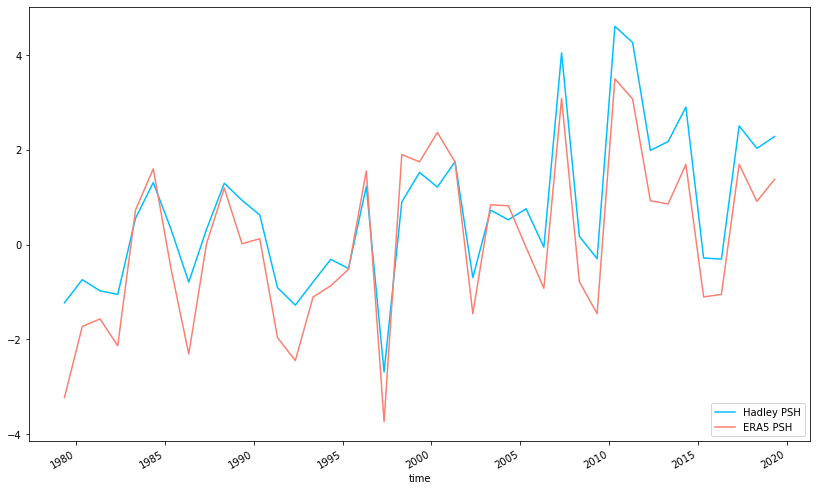

In [18]:
plt.figure(figsize=(14,8))
plt.title('Comparing PSH', fontsize = 'xx-large')
PSH.plot(label='Hadley PSH', color = 'deepskyblue')
ERA5PSH.plot(label='ERA5 PSH', color = 'salmon')
plt.legend(loc='lower right')

# NAT

In [19]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('1979-05-01', '2019-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())

marchmean.time.data = maymean.time.data
NAT = maymean - marchmean
print("not normalized", NAT)
NATstd = 1.648686
NATmean = -12.909709
NAT = (NAT - NATmean)/NATstd
print("Hadley NAT", NAT)

not normalized <xarray.DataArray (time: 41)>
array([-11.807617, -15.503784, -11.714355, -12.10437 , -14.550659, -13.497314,
       -15.191467, -12.831665, -11.989197, -14.522034, -11.29425 , -12.444458,
       -13.717285, -12.782898, -12.491272, -16.267395, -12.129761, -12.581299,
       -13.2099  , -12.784546, -11.362488, -12.99939 , -12.135864,  -8.766357,
       -11.892883, -12.373352, -14.332581,  -8.838928, -15.790039,  -9.223572,
       -13.383362, -14.19458 , -13.968994, -12.924805, -10.814575, -12.504822,
       -12.383484, -12.062744, -14.446899, -10.198425,  -9.85083 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
Hadley NAT <xarray.DataArray (time: 41)>
array([ 0.668467, -1.57342 ,  0.725034,  0.488473, -0.995308, -0.356408,
       -1.383986,  0.047337,  0.558331, -0.977945,  0.979846,  0.282195,
       -0.48983 ,  0.076916,  0.2538  , -2.036583,  0.473073,  0.199195,
       -0.182079,  0.075917,  0.938457, -0.0543

In [20]:
#AnomalousAsianLowpredictor

latrange = ERA5slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = ERA5slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (ERA5slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1979-03-01', '2019-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())/100

maydata = ERA5slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (ERA5slp['time.month']==5))
maySLP = maydata.sel(time = slice('1979-05-01', '2019-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())/100

marchmean.time.data = maymean.time.data
ERA5NAT = maymean - marchmean
print("not normalized", ERA5NAT)
NATstd = 1.648686
NATmean = -12.909709
ERA5NAT = (ERA5NAT - NATmean)/NATstd
print("ERA5 NAT", ERA5NAT)

not normalized <xarray.DataArray (time: 41)>
array([-10.631864, -14.340972,  -9.126449, -10.193157, -13.652181, -12.778159,
       -13.735839,  -9.927257, -10.462081, -13.066401,  -9.506631, -10.175816,
       -12.675908,  -9.93899 , -10.770244, -15.592013, -10.695296,  -9.790756,
       -11.528563, -11.092685,  -8.696141, -10.60673 ,  -9.956297,  -3.559531,
       -10.93177 , -10.173223, -13.849959,  -8.076143, -14.689679,  -8.182575,
       -12.324849, -13.558468, -13.528977, -11.918684,  -9.821346, -11.229266,
       -11.037338, -10.595239, -13.174126,  -8.998454,  -8.413853])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 NAT <xarray.DataArray (time: 41)>
array([ 1.381612, -0.868123,  2.294712,  1.647707, -0.450342,  0.079791,
       -0.501084,  1.808987,  1.484593, -0.09504 ,  2.064116,  1.658225,
        0.141811,  1.801871,  1.297679, -1.626934,  1.343138,  1.891781,
        0.837725,  1.102104,  2.555713,  1.396857,  1.791373,  5.67129

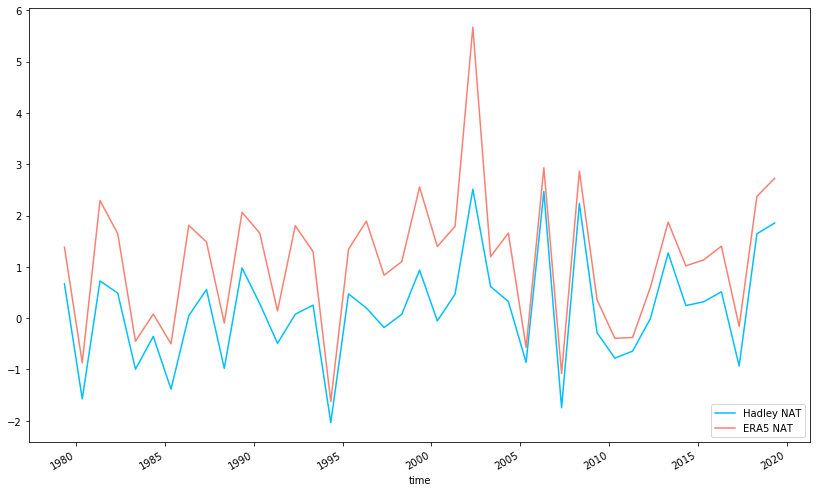

In [21]:
plt.figure(figsize=(14,8))
plt.title('Comparing NAT', fontsize = 'xx-large')
NAT.plot(label='Hadley NAT', color = 'deepskyblue')
ERA5NAT.plot(label='ERA5 NAT', color = 'salmon')
plt.legend(loc='lower right')

# Precipitation

In [22]:
#precipitation

junenumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
junedata = precipALLIN.sel(time = precipALLIN['time.month']==6, int = junenumber)
juneprecipALLIN = junedata.data[junenumber]

julynumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
julydata = precipALLIN.sel(time = precipALLIN['time.month']==7, int = julynumber)
julyprecipALLIN = julydata.data[julynumber]

augustnumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
augustdata = precipALLIN.sel(time = precipALLIN['time.month']==8, int = augustnumber)
augustprecipALLIN = augustdata.data[augustnumber]

septembernumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
septemberdata = precipALLIN.sel(time = precipALLIN['time.month']==9, int = septembernumber)
septemberprecipALLIN = septemberdata.data[septembernumber]

rainfallforAIRIfull = juneprecipALLIN.data + julyprecipALLIN.data + augustprecipALLIN.data + septemberprecipALLIN.data

rainfall = []
for y in range(89):
    rainfall.append(rainfallforAIRIfull[y+29])
print(rainfall)

rainfallstd = np.std(rainfall)
rainfallmean = np.mean(rainfall)

print()
print("rainfallstd", rainfallstd)
print("rainfallmean", rainfallmean)

[889.3, 722.0, 791.80005, 860.8, 750.3, 716.4, 884.89996, 777.49994, 897.0, 889.3, 934.89996, 736.30005, 805.80005, 784.4, 898.0, 780.6, 950.6, 1004.2, 650.8, 884.5, 719.0, 865.8, 869.0, 823.0, 862.6, 803.60004, 902.6, 853.0, 767.7, 821.1, 804.4, 877.0, 803.4, 975.8, 913.39996, 843.5, 908.19995, 841.89996, 908.19995, 789.4, 853.1, 728.30005, 957.69995, 868.2001, 920.3, 910.80005, 903.60004, 945.3, 873.89996, 903.69995, 876.9, 738.8, 792.9, 922.89996, 885.30005, 930.0, 983.2, 788.5, 889.3, 944.1, 839.7, 1020.2, 809.8, 857.9, 922.5, 709.39996, 739.9, 860.1, 754.6, 831.0, 939.8, 886.8, 652.8, 913.4, 748.0, 962.7, 856.80005, 883.2, 909.30005, 707.7, 882.8, 852.19995, 735.4, 955.60004, 836.7, 759.8, 743.0, 697.1, 961.5]

rainfallstd 82.409775
rainfallmean 847.2865


# Model

original datasets <xarray.DataArray (time: 41)>
array([-0.841861, -0.391936, -0.249375, -0.768641,  0.221423,  0.514178,
        0.576565, -0.068022, -0.431741,  0.870944,  0.174719,  0.265613,
       -0.407606, -0.883487, -0.791572,  0.10981 ,  0.329057,  0.264809,
       -1.74074 ,  0.912205,  0.169551, -0.205628,  0.300713, -0.534271,
        1.061409,  0.429389, -0.106603, -0.172185,  1.930682, -0.840727,
       -0.839926,  1.67173 ,  1.036083,  0.400529,  0.753234,  0.396013,
       -1.062325,  0.402801,  1.074661,  0.133428, -0.063379])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 <xarray.DataArray (time: 41)>
array([-1.467845, -0.389898, -1.166996, -0.787159, -0.230611,  0.569604,
        0.547385, -0.975713, -1.143652,  0.987455, -0.169661, -0.431745,
       -0.812221, -1.611033, -1.068156, -0.175591, -0.153411,  0.056882,
       -1.750076,  0.634005,  0.044337,  0.23855 ,  0.478685, -1.743346,
        0.836948,  0.22545 , -0.631989,

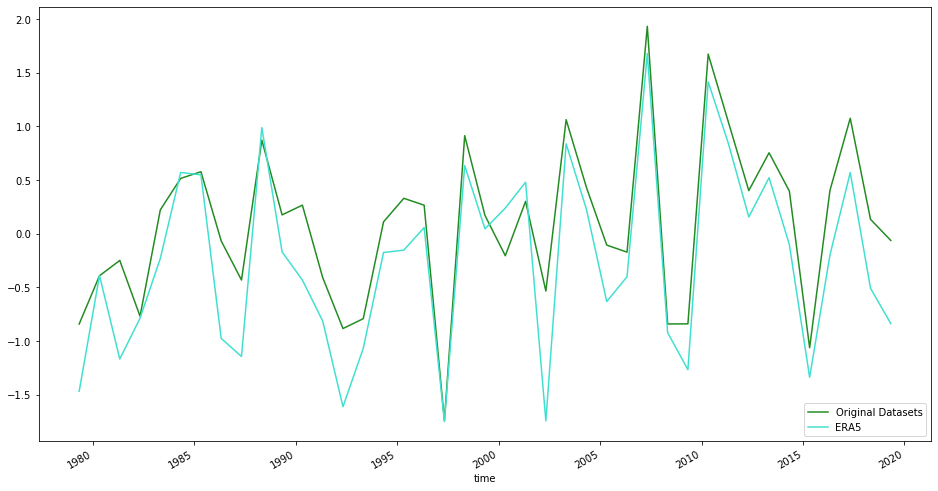

In [23]:
#Dr. Wang's coefficients
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
print("original datasets", AIRI)

ERA5AIRI = 0.47*ERA5EPT + 0.19*ERA5CPT + 0.23*ERA5PSH - 0.24*ERA5NAT
print("ERA5", ERA5AIRI)

plt.figure(figsize=(16,8))
plt.title('Comparing AIRI', fontsize = 'xx-large')
AIRI.plot(label='Original Datasets', color = 'forestgreen')
ERA5AIRI.plot(label='ERA5', color = 'turquoise')
plt.legend(loc='lower right')

original datasets final <xarray.DataArray (time: 41)>
array([ 777.908954,  814.987136,  826.735522,  783.942937,  865.533886,
        889.659783,  894.801123,  841.680839,  811.706842,  919.060779,
        861.685061,  869.1756  ,  813.695754,  774.478534,  782.053212,
        856.335911,  874.404033,  869.109317,  703.832519,  922.461067,
        861.259187,  830.340754,  872.068179,  803.257362,  934.756994,
        882.672309,  838.501342,  833.096801, 1006.393588,  778.002344,
        778.068383,  985.053365,  932.669866,  880.294028,  909.36038 ,
        879.921882,  759.740567,  880.481239,  935.84906 ,  858.282269,
        842.063482])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2019-05-01
ERA5 final <xarray.DataArray (time: 41)>
array([726.321689, 815.155105, 751.114648, 782.416923, 828.281938, 894.22745 ,
       892.396374, 766.878232, 753.038399, 928.662474, 833.304778, 811.706474,
       780.351542, 714.521603, 759.259985, 832.816048, 834.643915

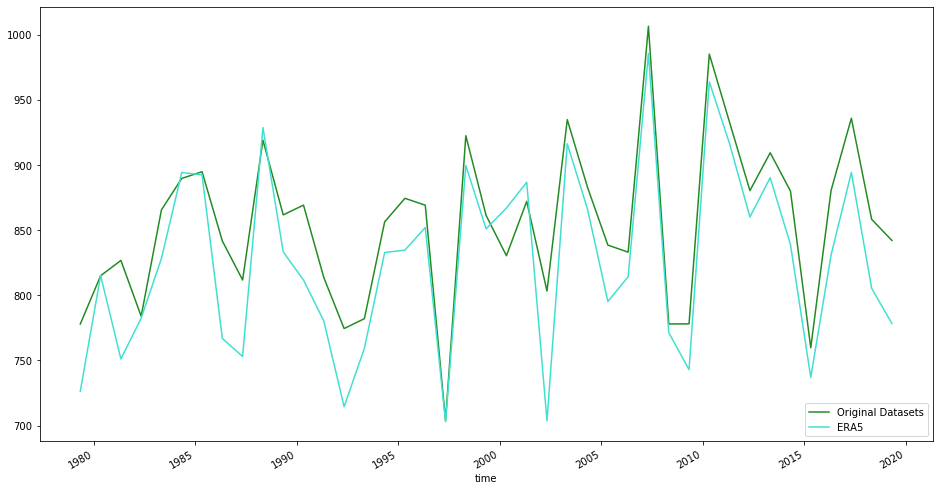

In [26]:
final = (AIRI * rainfallstd) + rainfallmean
print("original datasets final", final)

ERA5final = (ERA5AIRI * rainfallstd) + rainfallmean
print("ERA5 final", ERA5final)

plt.figure(figsize=(16,8))
plt.title('Comparing final', fontsize = 'xx-large')
final.plot(label='Original Datasets', color = 'forestgreen')
ERA5final.plot(label='ERA5', color = 'turquoise')
plt.legend(loc='lower right')

In [25]:
# Copyright (c) 2020 Medha Palavalli.